# 📊 Exploratory Data Analysis for Bellabeat


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned datasets
activity = pd.read_csv("../data/processed/clean_daily_activity_merged.csv")
sleep = pd.read_csv("../data/processed/clean_sleep_day.csv")

# -----------------------------
# 🔹 Step 1: Overview & Structure
# -----------------------------

In [2]:
print("Daily Activity Dataset Info:")
activity.info()
print("\nSummary Statistics:")
print(activity.describe())

# Unique users and date range
print("Unique Users:", activity['id'].nunique())
print("Date Range:", activity['activitydate'].min(), "to", activity['activitydate'].max())

Daily Activity Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        940 non-null    int64  
 1   activitydate              940 non-null    object 
 2   totalsteps                940 non-null    int64  
 3   totaldistance             940 non-null    float64
 4   trackerdistance           940 non-null    float64
 5   loggedactivitiesdistance  940 non-null    float64
 6   veryactivedistance        940 non-null    float64
 7   moderatelyactivedistance  940 non-null    float64
 8   lightactivedistance       940 non-null    float64
 9   sedentaryactivedistance   940 non-null    float64
 10  veryactiveminutes         940 non-null    int64  
 11  fairlyactiveminutes       940 non-null    int64  
 12  lightlyactiveminutes      940 non-null    int64  
 13  sedentaryminutes          940 non-nu

# -----------------------------
# 🔹 Step 2: Missing Values
# -----------------------------

In [3]:
print("\nMissing Values:\n", activity.isnull().sum())


Missing Values:
 id                          0
activitydate                0
totalsteps                  0
totaldistance               0
trackerdistance             0
loggedactivitiesdistance    0
veryactivedistance          0
moderatelyactivedistance    0
lightactivedistance         0
sedentaryactivedistance     0
veryactiveminutes           0
fairlyactiveminutes         0
lightlyactiveminutes        0
sedentaryminutes            0
calories                    0
dtype: int64


# -----------------------------
# 🔹 Step 3: Correlation Heatmap
# -----------------------------

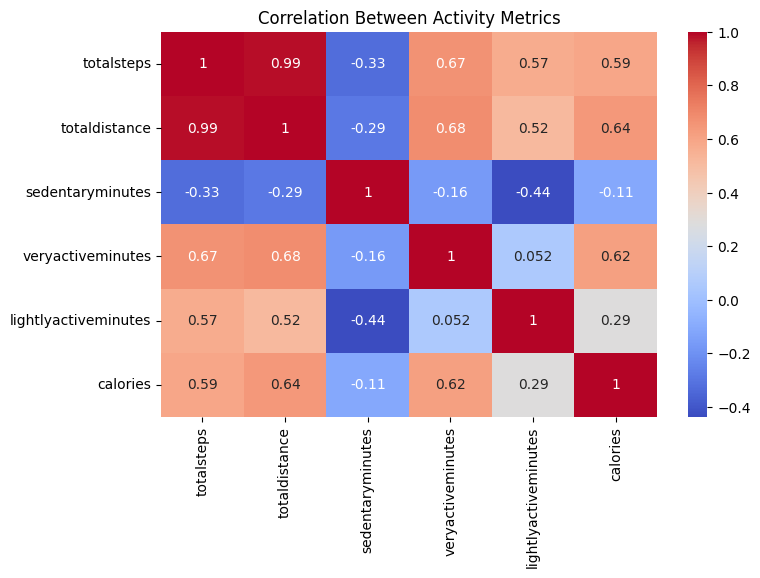

In [4]:
plt.figure(figsize=(8, 5))
sns.heatmap(activity[['totalsteps', 'totaldistance', 'sedentaryminutes', 'veryactiveminutes', 'lightlyactiveminutes', 'calories']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Activity Metrics')
plt.show()

# -----------------------------
# 🔹 Step 4: Steps vs Calories
# -----------------------------

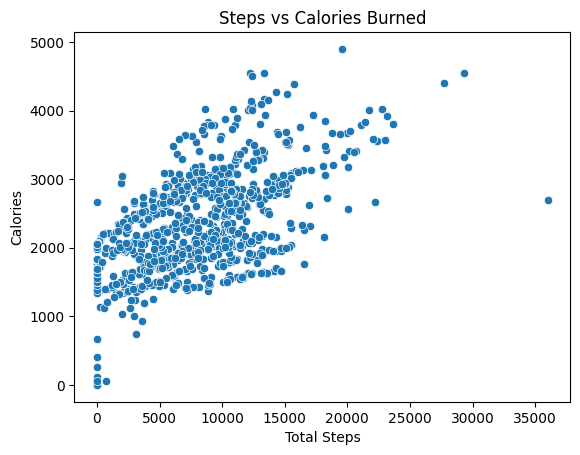

In [5]:
sns.scatterplot(data=activity, x='totalsteps', y='calories')
plt.title("Steps vs Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories")
plt.show()

# -----------------------------
# 🔹 Step 5: Activity by Weekday
# -----------------------------

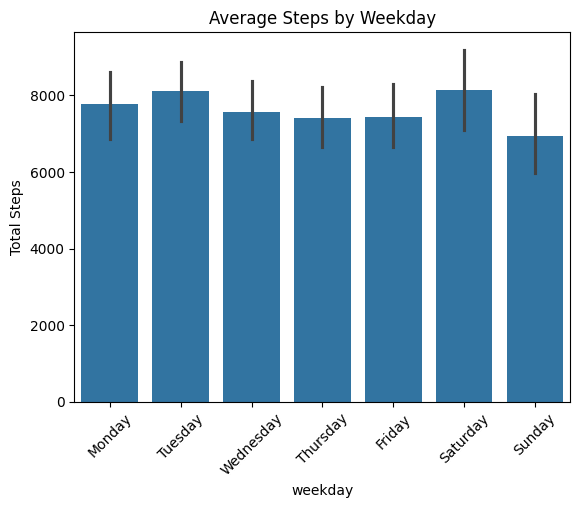

In [6]:
# Convert to datetime
activity['activitydate'] = pd.to_datetime(activity['activitydate'])
activity['weekday'] = activity['activitydate'].dt.day_name()

# Ensure weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=activity, x='weekday', y='totalsteps', order=weekday_order)
plt.xticks(rotation=45)
plt.title("Average Steps by Weekday")
plt.ylabel("Total Steps")
plt.show()

# -----------------------------
# 🔹 Step 6: Merge Sleep and Activity
# -----------------------------

In [7]:
sleep['activitydate'] = pd.to_datetime(sleep['activitydate'])
merged = pd.merge(activity, sleep, on=['id', 'activitydate'])


# -----------------------------
# 🔹 Step 7: Sleep vs Steps
# -----------------------------

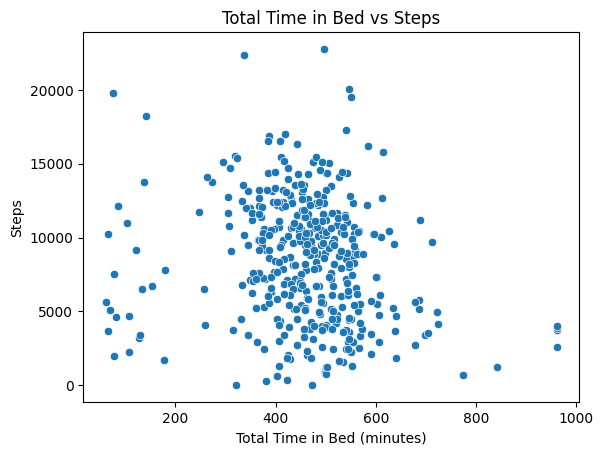

In [8]:
sns.scatterplot(data=merged, x='totaltimeinbed', y='totalsteps')
plt.title("Total Time in Bed vs Steps")
plt.xlabel("Total Time in Bed (minutes)")
plt.ylabel("Steps")
plt.show()


# -----------------------------
# 🔹 Step 8: Average Activity per User
# -----------------------------

In [ ]:
user_summary = activity.groupby('id')[['totalsteps', 'veryactiveminutes', 'sedentaryminutes']].mean().reset_index()
print("Top 5 Most Active Users by Avg Steps:\n", user_summary.sort_values(by='totalsteps', ascending=False).head())


user_summary.to_csv("../data/processed/user_activity_summary.csv", index=False)

print("✅ EDA complete!")

Top 5 Most Active Users by Avg Steps:
             id    totalsteps  veryactiveminutes  sedentaryminutes
32  8877689391  16040.032258          66.064516       1112.870968
27  8053475328  14763.290323          85.161290       1148.000000
0   1503960366  12116.741935          38.709677        848.161290
5   2022484408  11370.645161          36.290323       1112.580645
25  7007744171  11323.423077          31.038462       1055.346154
✅ EDA complete!
